In [1]:
import cv2

In [2]:
import os

In [3]:
Images=[]
Labels=[]
for j in os.listdir("C:/Users/athir/Downloads/without_mask"):
        img = cv2.imread("C:/Users/athir/Downloads/without_mask/"+j)
        img=cv2.resize(img,(150,150))
        Images.append(img)
        Labels.append(0)
for k in os.listdir("C:/Users/athir/Downloads/with_mask"):
        img = cv2.imread("C:/Users/athir/Downloads/with_mask/"+k)
        img=cv2.resize(img,(150,150))
        Images.append(img)
        Labels.append(1)

In [4]:
import numpy as np
Features = np.array(Images)
Target=np.array(Labels)

In [5]:
Features.shape

(1376, 150, 150, 3)

In [6]:
Target.shape

(1376,)

In [7]:
import matplotlib.pyplot as plt

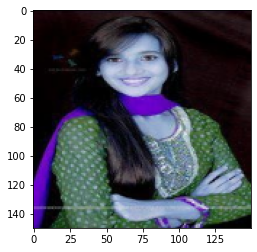

In [8]:
plt.imshow(Features[0])

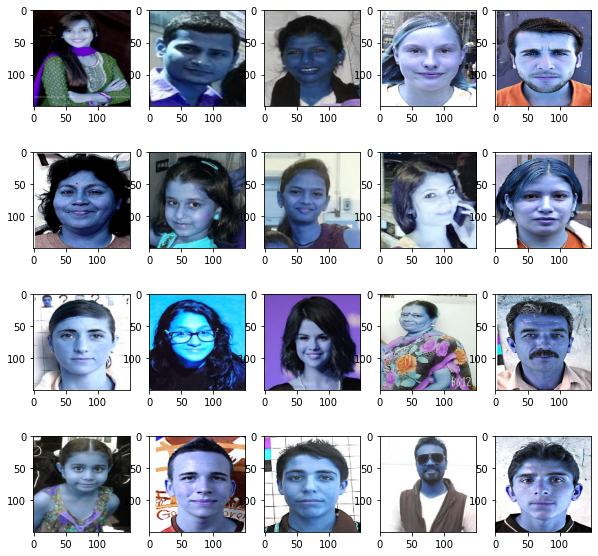

In [9]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(Features[i])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_features,test_features,train_target,test_target = train_test_split(Features,Target,test_size=0.1)

In [12]:
train_features.shape

(1238, 150, 150, 3)

In [13]:
def transformations(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #img=img/255
    return img

In [14]:
train_features=np.asarray(list(map(transformations,train_features)))

In [15]:
train_features.shape

(1238, 150, 150)

In [16]:
train_features=train_features.reshape(1238,150,150,1)

In [17]:
def getClassName(classNo):
    if   classNo == 0: return 'Non-masked'
    elif classNo == 1: return 'Masked'    

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
dataGen = ImageDataGenerator(rotation_range=10,width_shift_range = 0.1,height_shift_range = 0.1,shear_range = 0.1,zoom_range=0.2)

In [20]:
dataGen.fit(train_features)

In [21]:
from keras.utils import to_categorical

In [22]:
train_target=to_categorical(train_target)

In [23]:
train_target.shape

(1238, 2)

# Specify the Architecture

In [24]:
from keras.models import Sequential

In [25]:
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [26]:
model=Sequential()

In [27]:
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(150,150,1)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))          

# Compile the Model

In [28]:
from keras.optimizers import Adam

In [29]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# Train the Model

In [30]:
model.fit_generator(dataGen.flow(train_features,train_target,batch_size=20),epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
62/62 [==============================] - 146s 2s/step - loss: 44.5374 - accuracy: 0.5525
Epoch 2/20
62/62 [==============================] - 148s 2s/step - loss: 0.6531 - accuracy: 0.6090
Epoch 3/20
62/62 [==============================] - 173s 3s/step - loss: 0.6165 - accuracy: 0.6624
Epoch 4/20
62/62 [==============================] - 181s 3s/step - loss: 0.5940 - accuracy: 0.7141
Epoch 5/20
62/62 [==============================] - 207s 3s/step - loss: 0.5968 - accuracy: 0.6971
Epoch 6/20
62/62 [==============================] - 200s 3s/step - loss: 0.4744 - accuracy: 0.7787
Epoch 7/20
62/62 [==============================] - 203s 3s/step - loss: 0.4833 - accuracy: 0.7625
Epoch 8/20
62/62 [==============================] - 219s 4s/step - loss: 0.3759 - accuracy: 0.8368
Epoch 9/20
62/62 [==============================] - 222s 4s/step - loss: 0.2766 - accuracy: 0.8910
Epoch 10/20
62/62 [=============

In [31]:
file=open("C:/Users/athir/Documents/Jupyter_notebook/Mask_Unmask.json","w")
model_json=model.to_json()
file.write(model_json)
file.close()
model.save_weights("C:/Users/athir/Documents/Jupyter_notebook/Traffic_Signals_weights.h5")

In [ ]:
from keras.models import model_from_json

In [ ]:
file=open("C:/Users/athir/Documents/Jupyter_notebook/Traffic_Signals.json","r")
json_model=file.read()
loaded_model=model_from_json(json_model)
loaded_model.load_weights("C:/Users/athir/Documents/Jupyter_notebook/Traffic_Signals_weights.h5")

# Test the model

In [76]:
cam=cv2.VideoCapture(0)
cam.set(3,440)
cam.set(4,480)
cam.set(10,10)

True

In [77]:
def cropface(img):
    model1=cv2.CascadeClassifier("C:/Users/athir/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")
    faces=model1.detectMultiScale(img,1.03,3)
    x,y,w,h=faces[0]
    print(faces)
    img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    return img

In [ ]:
while True:
    message,pixels=cam.read()
    imgarr=np.asarray(pixels)
    imgarr=cv2.resize(imgarr,(150,150))
    imgarr=transformations(imgarr)
    imgarr.resize(1,150,150,1)
    predictions=model.predict(imgarr)
    ClassIndex=model.predict_classes(imgarr)
    if ClassIndex==0:
        cv2.putText(pixels,getClassName(ClassIndex),(120,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    else:
        cv2.putText(pixels,getClassName(ClassIndex),(120,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    pixels=cropface(pixels)
    cv2.imshow("Predictions",pixels)
    asciivalue=cv2.waitKey(1)
    if asciivalue == ord("s"):
        cv2.destroyAllWindows()
        break


[[130 343  55  55]
 [238 239 226 226]]
[[598 278  41  41]
 [231 235 237 237]
 [198 177  29  29]
 [560 386  49  49]
 [ 70 258  32  32]]
[[109 358  27  27]
 [  6 427  33  33]
 [590 279  47  47]
 [104 196  29  29]
 [228 242 232 232]
 [ 68 253  29  29]
 [124 254  66  66]]
[[591 234  29  29]
 [ 38 372  28  28]
 [556 390  50  50]
 [591 280  46  46]
 [189 197  31  31]
 [233 244 227 227]
 [127 185  67  67]]
[[557 394  51  51]
 [196 185  29  29]
 [574 363  49  49]
 [124 348  50  50]
 [236 244 230 230]
 [151 177  52  52]]
[[537 300  25  25]
 [120 415  28  28]
 [558 393  48  48]
 [124 346  50  50]
 [236 241 230 230]
 [120 380  40  40]]
[[600 173  30  30]
 [146 158  62  62]
 [234 226 241 241]
 [576 353  52  52]
 [568 368  26  26]]
[[146 133  60  60]
 [ 37 210  59  59]
 [130 224  64  64]
 [232 170 277 277]
 [100 175  46  46]
 [ 24 327  40  40]
 [ 46 343  32  32]
 [582 326  45  45]
 [116 332  58  58]]
[[ 62 453  26  26]
 [ 64 441  30  30]
 [ 89 408  40  40]
 [  5 105  56  56]
 [247 136 297 297]
 [ 6

[[220 102 325 325]]
[[ 70 347  35  35]
 [ 30 221  36  36]
 [114 274  34  34]
 [215 102 330 330]
 [584 180  36  36]]
[[216 100 329 329]
 [115 273  34  34]
 [589 228  38  38]
 [586 176  30  30]
 [116 327  32  32]
 [582 199  45  45]]
[[ 35 164  32  32]
 [ 69 339  33  33]
 [125 152  64  64]
 [  7 288  79  79]
 [ 81 193  55  55]
 [  9 253  78  78]
 [216  97 330 330]
 [590 119  32  32]
 [ 20 178  64  64]]
[[116 274  34  34]
 [ 92 138  33  33]
 [590 353  28  28]
 [ 72 344  33  33]
 [ 30 320  27  27]
 [217 102 323 323]
 [588 187  29  29]
 [ 57 198  32  32]]
[[210  95 340 340]
 [ 70 342  33  33]
 [ 30 316  26  26]
 [ 83 195  54  54]
 [115 326  32  32]
 [614 186  26  26]
 [579 171  44  44]]
[[112 357  27  27]
 [ 30 316  26  26]
 [ 29 216  38  38]
 [215  99 326 326]
 [ 64 338  41  41]
 [580 172  43  43]
 [ 31 252  33  33]]
[[ 30 317  26  26]
 [ 73 344  30  30]
 [218 100 327 327]
 [ 18 363  60  60]
 [ 90 138  36  36]
 [123 151  72  72]]
[[  2 372  33  33]
 [122 154  67  67]
 [218 100 325 325]]
[[1

[[  3 388  38  38]
 [  8 314  64  64]
 [ 89 216  52  52]
 [253 141 317 317]
 [  1  39  51  51]
 [ 17 278  73  73]]
[[272 159 304 304]
 [132 231  42  42]
 [ 88 216  54  54]
 [191 161  36  36]
 [ 75 362  34  34]
 [  8 111  56  56]
 [ 18 278  75  75]
 [ 67 322  64  64]]
[[ 76 362  33  33]
 [271 163 300 300]
 [131 229  47  47]
 [  5 389  39  39]
 [ 88 215  57  57]
 [ 15 312  74  74]
 [122 270  57  57]
 [ 14 277  80  80]]
[[102 159  31  31]
 [254 135 316 316]
 [  7 110  60  60]
 [131 230  46  46]
 [ 92 218  52  52]
 [145 363  29  29]
 [ 76 361  36  36]
 [ 16 277  78  78]
 [ 82 270  34  34]]
[[102 158  31  31]
 [110 321  31  31]
 [ 77 361  35  35]
 [251 131 299 299]
 [ 91 214  56  56]
 [  5 336  83  83]
 [ 20 312  72  72]
 [ 20 278  74  74]]
[[242 128 298 298]
 [  2  36  54  54]
 [ 90 212  55  55]
 [ 77 359  34  34]
 [ 84 264  47  47]
 [ 28 200  68  68]
 [ 76 323  56  56]
 [ 18 276  77  77]
 [ 12 307  80  80]
 [ 83 175  28  28]
 [576 170  51  51]
 [  5 107  64  64]]
[[547 154  28  28]
 [218 

[[191 307  30  30]
 [205 212  26  26]
 [176 283  28  28]
 [ 10 214  28  28]
 [ 82 233  34  34]
 [521 369  97  97]
 [499 308  45  45]
 [268 270 202 202]
 [531 404  31  31]
 [184 181  28  28]
 [116 258  63  63]
 [562 318  32  32]]
[[192 309  29  29]
 [579 282  45  45]
 [  0 405  25  25]
 [ 68 402  32  32]
 [537 407  28  28]
 [135 401  32  32]
 [264 273 199 199]
 [578 429  47  47]]
[[576 427  48  48]
 [500 310  42  42]
 [259 274 201 201]
 [  9 314  75  75]
 [175 182  75  75]]
[[194 305  30  30]
 [502 309  42  42]
 [551 392  37  37]
 [261 275 201 201]
 [486 265  77  77]
 [184 180  29  29]
 [ 12 314  72  72]
 [116 256  64  64]]
[[193 306  30  30]
 [567 366  38  38]
 [559 315  38  38]
 [136 399  32  32]
 [500 307  45  45]
 [578 280  43  43]
 [547 389  47  47]
 [264 284 192 192]
 [549 201  27  27]]
[[585 283  34  34]
 [524 409  42  42]
 [190 307  30  30]
 [501 310  43  43]
 [577 425  50  50]
 [567 367  37  37]
 [267 285 193 193]
 [117 259  63  63]
 [533 402  33  33]]
[[585 285  34  34]
 [190 

[[138 292  27  27]
 [ 32 363  26  26]
 [565 306  35  35]
 [  5 140  58  58]
 [589 272  39  39]
 [198 281  43  43]
 [280 212 237 237]
 [556 195  26  26]
 [550 380  48  48]
 [495 259  74  74]
 [ 38 265  30  30]
 [ 99 345  75  75]]
[[ 58 244  37  37]
 [ 75 391  29  29]
 [199 282  43  43]
 [563 305  38  38]
 [548 378  51  51]
 [282 216 233 233]
 [495 263  68  68]
 [ 98 188  26  26]
 [556 193  28  28]
 [ 99 346  75  75]
 [500 247 110 110]
 [586 273  41  41]]
[[528 204  34  34]
 [584 398  29  29]
 [197 282  43  43]
 [276 217 233 233]
 [495 259  74  74]
 [ 34 263  37  37]]
[[519 318  30  30]
 [  3 418  33  33]
 [510 301  39  39]
 [256 221 237 237]
 [132 199  66  66]
 [552 379  46  46]
 [493 261  70  70]
 [100 343  73  73]]
[[197 296  27  27]
 [ 76 389  31  31]
 [566 306  37  37]
 [551 378  48  48]
 [255 229 232 232]
 [493 255  78  78]]
[[189 170  28  28]
 [551 382  48  48]
 [133 231  56  56]
 [261 226 233 233]
 [510 301  41  41]
 [110 250  34  34]
 [ 34 262  38  38]]
[[208 138  25  25]
 [  2 

[[557 209  28  28]
 [536 402  28  28]
 [536 287  42  42]
 [510 317  44  44]
 [130 219  68  68]
 [534 382  86  86]
 [298 270 202 202]
 [144 406  33  33]]
[[ 79 450  25  25]
 [539 290  36  36]
 [145 407  33  33]
 [513 318  43  43]
 [540 383  76  76]
 [193 189  28  28]
 [514 187  27  27]
 [300 271 199 199]
 [104 362  76  76]]
[[156 228  37  37]
 [514 320  41  41]
 [193 191  28  28]
 [570 325  36  36]
 [557 397  48  48]
 [302 272 200 200]
 [539 381  84  84]]
[[559 212  27  27]
 [  4 436  39  39]
 [512 319  43  43]
 [538 383  80  80]
 [300 271 202 202]
 [192 190  32  32]
 [ 36 383  27  27]]
[[558 213  27  27]
 [144 410  32  32]
 [512 321  42  42]
 [538 385  83  83]
 [301 273 199 199]
 [137 231  56  56]
 [105 367  72  72]]
[[ 64 272  32  32]
 [ 77 407  34  34]
 [513 319  41  41]
 [540 384  74  74]
 [299 271 201 201]
 [104 366  74  74]]
[[557 208  28  28]
 [512 316  45  45]
 [ 79 407  32  32]
 [538 379  82  82]
 [300 271 201 201]
 [570 323  35  35]]
[[509 313  47  47]
 [538 380  78  78]
 [ 37

[[565 214  26  26]
 [520 313  38  38]
 [561 393  42  42]
 [200 291  48  48]
 [135 213  61  61]
 [540 375  79  79]
 [ 40 377  27  27]
 [300 272 198 198]
 [533 256  36  36]]
[[135 216  61  61]
 [540 375  83  83]
 [ 81 402  29  29]
 [301 273 198 198]
 [515 312  37  37]
 [ 38 375  26  26]
 [560 202  28  28]
 [590 282  42  42]
 [200 290  49  49]
 [107 356  74  74]]
[[100 152  29  29]
 [145 411  29  29]
 [514 321  40  40]
 [541 386  78  78]
 [194 193  26  26]
 [200 299  51  51]
 [305 280 191 191]
 [134 220  66  66]]
[[513 327  39  39]
 [506 232  35  35]
 [ 38 289  37  37]
 [590 296  41  41]
 [556 406  47  47]
 [539 389  82  82]
 [303 279 194 194]
 [201 303  50  50]]
[[568 330  37  37]
 [201 303  47  47]
 [ 36 388  26  26]
 [538 388  79  79]
 [ 91 264  59  59]
 [299 274 197 197]]
[[ 36 387  27  27]
 [559 387  29  29]
 [146 412  32  32]
 [569 328  34  34]
 [574 376  42  42]
 [509 320  45  45]
 [295 268 201 201]
 [ 28 253  67  67]]
[[598 417  32  32]
 [538 293  36  36]
 [556 401  45  45]
 [510 

[[ 64 242  35  35]
 [ 62 335  35  35]
 [591 218  42  42]
 [ 46 157  64  64]
 [192 112 307 307]
 [567 255  38  38]]
[[574 307  38  38]
 [169 117 305 305]
 [547 326  54  54]
 [584 216  51  51]
 [  1 247  82  82]
 [536 188  27  27]]
[[ 41  92  25  25]
 [ 64 240  34  34]
 [  0 248  79  79]
 [169 119 307 307]
 [547 327  52  52]
 [ 47 124  25  25]
 [567 255  40  40]]
[[ 88 221  27  27]
 [549 328  47  47]
 [ 64 241  36  36]
 [172 120 306 306]
 [557 315  26  26]
 [531 184  32  32]]
[[589 219  44  44]
 [542 289  39  39]
 [546 327  50  50]
 [176 123 306 306]
 [ 64 240  37  37]
 [534 218  44  44]
 [114 122  53  53]
 [587 174  36  36]]
[[550 282  26  26]
 [ 67 242  34  34]
 [547 293  33  33]
 [587 220  45  45]
 [188 151 292 292]
 [  4 286  74  74]
 [  0 251  79  79]
 [ 62 336  32  32]
 [546 327  53  53]
 [535 187  30  30]
 [113 120  59  59]
 [589 175  34  34]
 [ 75 185  58  58]]
[[ 64 352  25  25]
 [560 142  27  27]
 [195 158 287 287]
 [548 329  50  50]
 [  3 285  76  76]
 [ 87 131  29  29]]
[[199

[[113 282  28  28]
 [106 308  34  34]
 [106 317  38  38]
 [  3 289  71  71]
 [ 62 334  38  38]
 [550 331  47  47]
 [228 119 271 271]
 [125 121  25  25]
 [118 140  75  75]
 [534 189  29  29]
 [ 77 187  54  54]]
[[ 69 147  29  29]
 [ 71 218  32  32]
 [127  94  63  63]
 [108 352  26  26]
 [122 144  62  62]
 [213 126 302 302]]
[[504 445  26  26]
 [ 72 216  34  34]
 [536 343  32  32]
 [203 101 303 303]
 [112 264  28  28]
 [134 102  56  56]]
[[563 142  26  26]
 [540 220  34  34]
 [510 139  34  34]
 [129  93  58  58]
 [600 233  33  33]
 [231 110 257 257]
 [175  98  27  27]
 [108 215  51  51]
 [134 333  30  30]
 [547 324  53  53]
 [588 130  28  28]
 [521 187  56  56]
 [114 191  56  56]]
[[ 63 319  32  32]
 [123  78  65  65]
 [117 125  64  64]
 [ 91 273  72  72]
 [236 107 252 252]
 [537 198  40  40]
 [ 18 187  38  38]]
[[548 229  25  25]
 [139 145  30  30]
 [ 42 414  33  33]
 [ 60 223  33  33]
 [ 61 318  34  34]
 [587 150  40  40]
 [548 307  50  50]
 [238 110 250 250]
 [113 122  71  71]
 [559 1

[[ 68 329  31  31]
 [ 49 404  30  30]
 [ 90 344  57  57]
 [202  65  26  26]
 [211 148 290 290]
 [ 80 179  54  54]]
[[593 162  28  28]
 [569 161  29  29]
 [130 226  29  29]
 [541 212  35  35]
 [ 64 323  36  36]
 [ 48 401  31  31]
 [552 319  48  48]
 [119 131  69  69]
 [206 136 293 293]]
[[ 46 146  64  64]
 [ 71 301  28  28]
 [207 134 292 292]
 [ 65 324  33  33]
 [538 208  39  39]
 [574 295  40  40]
 [553 319  46  46]
 [ 78 174  56  56]
 [564 130  26  26]
 [540 125  26  26]
 [544 256  37  37]]
[[ 64 228  35  35]
 [576 296  37  37]
 [ 60 290  45  45]
 [553 318  46  46]
 [209 133 293 293]
 [ 87 115  33  33]
 [540 123  31  31]
 [ 74 171  59  59]
 [593 206  44  44]
 [524 234  91  91]]
[[ 65 357  25  25]
 [ 75 154  28  28]
 [ 37 359  26  26]
 [587 343  36  36]
 [530 136  35  35]
 [126  90  57  57]
 [ 79 204  36  36]
 [522 276  74  74]
 [ 56 287  56  56]
 [203 144 295 295]
 [565 124  28  28]
 [ 70 194  25  25]
 [ 60 325  36  36]
 [ 55 259  39  39]]
[[587 159  40  40]
 [ 84 238  25  25]
 [164 1

[[145   1  76  76]
 [ 11 160  54  54]
 [ 78 313  34  34]
 [512 141  70  70]
 [162 111 319 319]
 [524 241  83  83]
 [ 51 111  72  72]
 [531 175  53  53]]
[[  3 317  35  35]
 [174   3  61  61]
 [ 35 346  48  48]
 [145   2  77  77]
 [567  66  58  58]
 [  6 214  47  47]
 [  7 352  25  25]
 [  9 162  56  56]
 [525 239  86  86]
 [508 139  75  75]
 [161 114 318 318]
 [584 128  27  27]
 [574 114  32  32]
 [526 175  53  53]
 [ 52 113  73  73]]
[[531  98  27  27]
 [533 138  35  35]
 [  1 317  40  40]
 [ 10 161  57  57]
 [509 145  72  72]
 [524 241  88  88]
 [162 114 316 316]
 [530 212  80  80]
 [526 178  52  52]
 [  8 111  50  50]
 [ 55 118  66  66]]
[[  3 324  31  31]
 [ 37 277  33  33]
 [ 38 347  50  50]
 [510 144  76  76]
 [527 244  86  86]
 [165 116 314 314]
 [ 18 102  31  31]
 [585 131  26  26]
 [ 43 168  42  42]
 [524 177  58  58]
 [ 54 116  70  70]]
[[585 141  30  30]
 [ 37 277  32  32]
 [ 77 316  35  35]
 [527 244  87  87]
 [  9 161  60  60]
 [513 146  70  70]
 [166 118 313 313]
 [  4 31